In [1]:
#import the libraries
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

#read the datasets separately
d1 = pd.read_excel("C:\\Users\\project_export.xlsx",  sheet_name='project_export')
d2 = pd.read_excel("C:\\Users\\project_categories.xlsx",  sheet_name='project_categories')

#print the columns
print("Column headings:")
print(d1.columns)
print(d2.columns)

Column headings:
Index(['id', 'organization_id', 'description', 'created_at', 'updated_at',
       'state', 'user_id', 'needs_accomplish', 'needs_support', 'needs_value',
       'campaign_id', 'image_id', 'project_inquiries_count', 'admin_id',
       'project_group', 'project_category_id', 'local_only', 'success_story',
       'partner_organization_id', 'match_job_id', 'satisfaction_rating',
       'agreed_at_community', 'timeline', 'publish_externally',
       'enable_success_story', 'is_archived', 'share_metadata'],
      dtype='object')
Index(['id', 'created_at', 'updated_at', 'group_slug', 'enabled',
       'international', 'name', 'slug'],
      dtype='object')


In [5]:
#select the relevant columns in the data
d1 = d1.iloc[:, [0,3,4,5,12,15]]
d2 = d2.iloc[:, [0,6]]

#merge the datasets on preject category id
data = pd.merge(d1, d2, how = 'left', left_on = "project_category_id", right_on = "id")
data.head()

,id_x,created_at,updated_at,state,project_inquiries_count,project_category_id,id_y,name
0,5948,2017-07-06 17:27:44.906,2017-08-30 01:39:47.520,closed,3,19,19,Website design
1,5908,2017-06-28 16:55:47.853,2017-11-11 18:17:38.379,completed,3,14,14,Design
2,9339,2019-01-15 00:00:34.636,2019-01-15 00:00:34.636,draft,0,14,14,Design
3,5975,2017-07-10 15:36:19.184,2017-09-27 13:39:17.767,closed,0,2,2,Business Planning
4,9981,2019-04-03 03:19:57.849,2019-04-03 03:19:57.849,draft,0,1,1,Accounting & Finance


In [6]:
#select the relevant columns in the data and rename the columns to remove ambiguity
data = data.iloc[:, [0,1,2,3,4,7]]
data.rename(columns={'id_x': 'ProjectId'}, inplace = True)

In [7]:
#select the completed projects only
data = data.query('state == "completed"')

In [9]:
#calculate the difference between start and updat dates in days and name the column 'difference'
data['Difference'] = data['updated_at'].sub(data['created_at'], axis=0).dt.days
data.head()

,ProjectId,created_at,updated_at,state,project_inquiries_count,name,Difference
1,5908,2017-06-28 16:55:47.853,2017-11-11 18:17:38.379,completed,3,Design,136
5,2646,2016-04-12 17:27:07.249,2016-10-31 17:44:05.194,completed,1,Marketing Strategy,202
10,5688,2017-06-03 13:01:34.481,2017-12-11 22:51:04.735,completed,1,Program Design,191
11,3588,2016-08-04 17:58:42.821,2017-08-28 15:04:48.039,completed,1,Business Planning,388
13,210,2014-11-25 00:11:37.809,2015-07-28 14:37:53.311,completed,1,Multimedia,245


In [11]:
#calculate the average number of dasy taken to finish projects for several project categories
data.groupby("name")["Difference"].mean().sort_values()

name
Design                  151.701613
IT Infrastructure       156.800000
Accounting & Finance    158.331754
Staff Development       167.508772
HR Management           167.695946
Copy writing/editing    179.625000
Evaluation              183.629630
CRM                     188.137795
Brand Development       201.912791
Board Development       203.620000
Website development     205.009615
Messaging               207.539568
Research                208.346535
Website design          212.767528
Program Design          216.154762
Business Planning       219.415550
Multimedia              222.951613
Marketing Strategy      227.346789
Project Management      239.133333
Mobile Development      254.344828
Public Relations        256.896552
Name: Difference, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016703E40630>]],
      dtype=object)

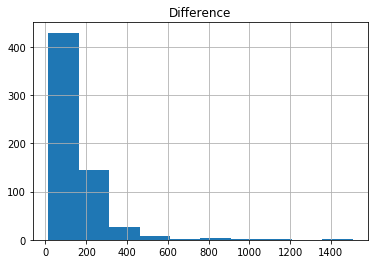

In [12]:
#plot the histogram of the days taken to complete design projects
data.query('name == "Design"').hist("Difference")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000167064C1EB8>]],
      dtype=object)

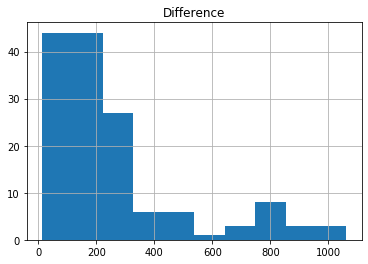

In [13]:
#plot the histogram of the days taken to complete public relations projects
data.query('name == "Public Relations"').hist("Difference")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AA671FE10>]],
      dtype=object)

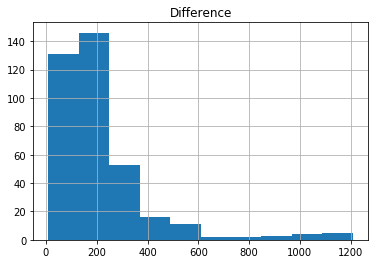

In [24]:
#plot the histogram of the days taken to complete business planning projects
data.query('name == "Business Planning"').hist("Difference")